In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import netket as nk

from einops import rearrange

/home/cwpark/acband-laughlin-instability/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


∣NK⟩ Tip: If timeit=True signals high \% spent sampling n_discarded, consider lowering it.

In [2]:
from src.qm_utils.lattice.lattice import Lattice2D
from src.qm_utils.lattice.brillouin_zone import BrillouinZone2D
from src.netket_compat import get_sector_constraints


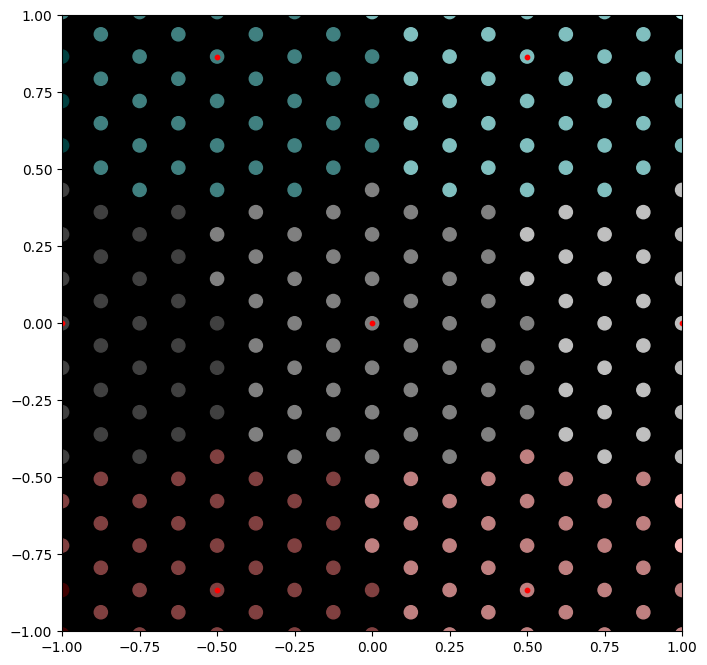

In [3]:
import matplotlib.pyplot as plt

sqrt3 = np.sqrt(3)
tri_lattice = Lattice2D(np.array(
    [[1/2, -sqrt3/2], [1/2, sqrt3/2]]
))


N = 3
xx = np.linspace(-N, N, 2 * N + 1)
yy = np.linspace(-N, N, 2 * N + 1)
mgrid = np.meshgrid(xx, yy, sparse=True)
points = tri_lattice.get_points(*mgrid, flatten=True)

A = tri_lattice.lattice_vectors
a1 = A[0]
a2 = A[1]
a3 = -a1 - a2
t1 = (1 / 3) * (a1 - a3)
t2 = (1 / 3) * (a2 - a3)

eps = 1e-6
M = 4
fine_points = np.arange(-N, N + eps, 1 / M)[:, None, None] * t1[None, None, :] + np.arange(-N, N + eps, 1 / M)[None, :, None] * t2[None, None, :]
fine_points = rearrange(fine_points, "x y a -> (x y) a")

lattice_coord, offsets = tri_lattice.divmod(fine_points)
colors = np.full((fine_points.shape[0], 3), 0.5)
colors += lattice_coord[:, 0][:, None] * np.array([[0.25, 0.0, 0]])
colors += lattice_coord[:, 1][:, None] * np.array([[0, 0.25, 0.25]])

colors = np.clip(colors, 0.0, 1.0)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.patch.set_facecolor('k')
ax.scatter(fine_points[:, 0], fine_points[:, 1], s=90, c=colors)
ax.scatter(points[:, 0], points[:, 1], c='r', s=10)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.show()

In [ ]:
sqrt3 = np.sqrt(3)
e1 = np.array([1, 0])
e2 = np.array([0, 1])
lB = 1.0
a_M = 1.0
a_M = (((4 * np.pi) / sqrt3) ** 0.5) * lB
a1 = a_M * e2
a2 = a_M * ((-sqrt3 / 2) * e1 + (1 / 2) * e2)
lattice = Lattice2D(np.stack([a1, a2]))
b = (4 * np.pi) / (a_M * sqrt3)
b1, b2 = lattice.reciprocal_lattice_vectors
b3 = -(b1 + b2)

from brillouin_zones import construct_brillouin_zones

bz = construct_brillouin_zones(lattice)

In [ ]:
R = b / sqrt3
thetas = np.linspace(np.pi / 2, 5 * np.pi / 2, 7)
hexagon_x = R * np.cos(thetas)
hexagon_y = R * np.sin(thetas)

for n, bz_n in bz.items():
    k_points = bz_n.k_points
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot()
    k_x = k_points[:, 0]
    k_y = k_points[:, 1]
    ax.scatter(k_x, k_y, s=250, c='k')
    for i in range(27):
        x = k_x[i]
        y = k_y[i]
        ax.text(x, y, f"{i}", fontsize=8, color="w", ha='center', va='center')
    ax.plot(hexagon_x, hexagon_y, color='k')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    plt.show()

In [ ]:
bz_27 = bz[27]
bz_28 = bz[28]
bz_48 = bz[48]
bz_49 = bz[49]

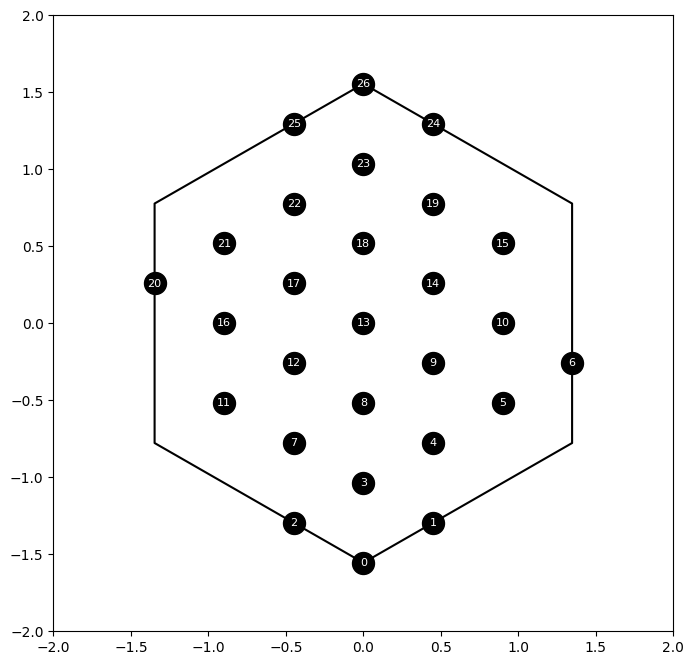

In [5]:
sampled_momentums = bz_27.k_points
R = np.max(np.linalg.norm(sampled_momentums, axis=-1))
thetas = np.linspace(np.pi / 2, 5 * np.pi / 2, 7)
hexagon_x = R * np.cos(thetas)
hexagon_y = R * np.sin(thetas)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
k_x = sampled_momentums[:, 0]
k_y = sampled_momentums[:, 1]
ax.scatter(k_x, k_y, s=250, c='k')
for i in range(27):
    x = k_x[i]
    y = k_y[i]
    ax.text(x, y, f"{i}", fontsize=8, color="w", ha='center', va='center')

ax.plot(hexagon_x, hexagon_y, color='k')

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

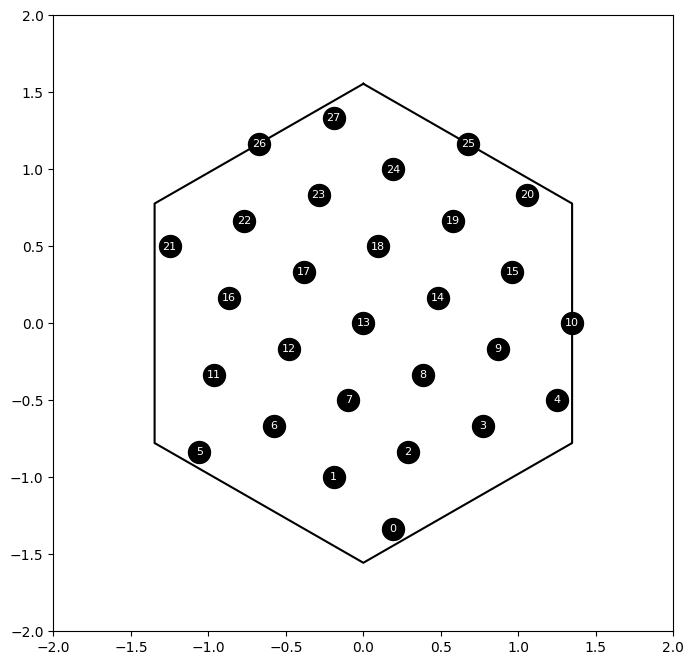

In [6]:
sampled_momentums = bz_28.k_points
thetas = np.linspace(np.pi / 2, 5 * np.pi / 2, 7)
hexagon_x = R * np.cos(thetas)
hexagon_y = R * np.sin(thetas)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
k_x = sampled_momentums[:, 0]
k_y = sampled_momentums[:, 1]
ax.scatter(k_x, k_y, s=250, c='k')
for i in range(28):
    x = k_x[i]
    y = k_y[i]
    ax.text(x, y, f"{i}", fontsize=8, color="w", ha='center', va='center')

ax.plot(hexagon_x, hexagon_y, color='k')

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

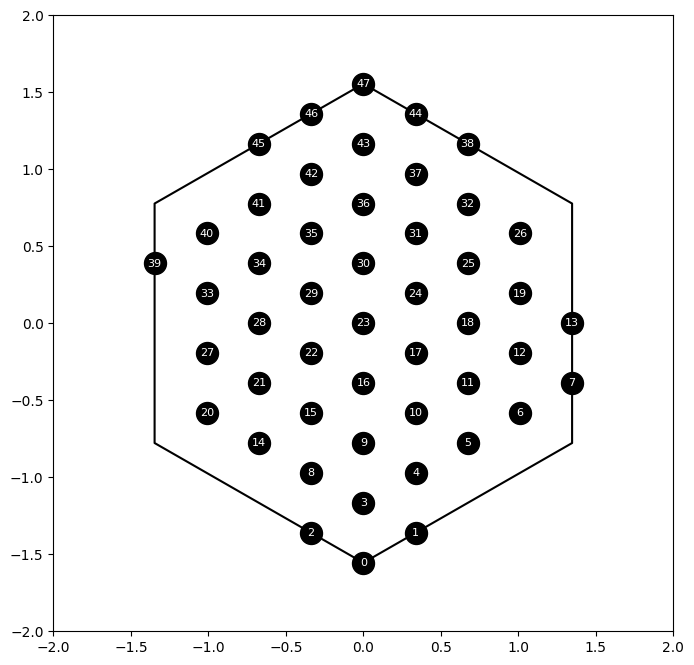

In [7]:
sampled_momentums = bz_48.k_points
thetas = np.linspace(np.pi / 2, 5 * np.pi / 2, 7)
hexagon_x = R * np.cos(thetas)
hexagon_y = R * np.sin(thetas)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
k_x = sampled_momentums[:, 0]
k_y = sampled_momentums[:, 1]
ax.scatter(k_x, k_y, s=250, c='k')
for i in range(48):
    x = k_x[i]
    y = k_y[i]
    ax.text(x, y, f"{i}", fontsize=8, color="w", ha='center', va='center')

ax.plot(hexagon_x, hexagon_y, color='k')

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

In [ ]:
from einops import rearrange

# sqrt3 = np.sqrt(3)
# e1 = np.array([1, 0])
# e2 = np.array([0, 1])
# a_M = 1.0
# a1 = a_M * e2
# a2 = a_M * ((-sqrt3 / 2) * e1 + (1 / 2) * e2)
# lattice = Lattice2D(np.stack([a1, a2]))
# b = (4 * np.pi) / (a_M * sqrt3)
# b1, b2 = lattice.reciprocal_lattice_vectors
# b3 = -(b1 + b2)

# # N = 27 grid
# t1 = (1 / 9) * (b1 - b2)
# t2 = (1 / 9) * (b1 - b3)

# sample_lattice = Lattice2D(np.stack([t1, t2]))

# # N = 28 grid
# p1 = b1 + t2 - t1
# normb1 = np.linalg.norm(b1)
# normp1 = np.linalg.norm(p1)
# distb1p1 = np.linalg.norm(b1 - p1)
# scale = normb1 / normp1
# rot = -np.arccos((normb1 ** 2 + normp1 ** 2 - distb1p1 ** 2) / (2 * normb1 * normp1))
# sample_lattice = sample_lattice.transformed(scale=scale, rot=rot)

# N = 3
# xx = np.linspace(-N, N, 2 * N + 1)
# yy = np.linspace(-N, N, 2 * N + 1)
# mgrid = np.meshgrid(xx, yy, sparse=True)
# points = lattice.reciprocal().get_points(*mgrid, flatten=True)

bz = bz_27

N = 3
xx = np.linspace(-N, N, 2 * N + 1)
yy = np.linspace(-N, N, 2 * N + 1)
mgrid = np.meshgrid(xx, yy, sparse=True)
points = bz.lattice.reciprocal().get_points(*mgrid, flatten=True)

N = 18
xx = np.linspace(-N, N, 2 * N + 1)
yy = np.linspace(-N, N, 2 * N + 1)
mgrid = np.meshgrid(xx, yy, sparse=True)
samples = bz.bz_sample_lattice.get_points(*mgrid, flatten=True)

lattice_coord, _ = lattice.reciprocal_divmod(samples)
colors = np.zeros((samples.shape[0], 3))
colors[:, 0] = 0.2
colors[:, 1] = 0.5
colors[:, 2] = 0.5

colors += lattice_coord[:, 0][:, None] * np.array([[0, 0.2, 0]])
colors += lattice_coord[:, 1][:, None] * np.array([[0, 0.0, 0.2]])

colors = np.clip(colors, 0.0, 1.0)

bz1 = bz.k_points
bz1_plus_bz1 = rearrange(bz1[:, None, :] + bz1[None, :, :], 'i j d -> (i j) d')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.patch.set_facecolor('k')
ax.scatter(samples[:, 0], samples[:, 1], s=75, c=colors)
ax.scatter(points[:, 0], points[:, 1], s=12, c='r')
# ax.scatter(bz1_plus_bz1[:, 0], bz1_plus_bz1[:, 1], c='w', s=5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()